# Graph laplacian and spectral clustering

## From data to graphs 

### Encoding information as a graph

![Local graph](data/how_umap_works_umap_graph.png)

### How to generate such graph?

Let $x_1, \dots, x_n$ be a set of points in $\mathbb{R}^n$ and $s_{ij}$ the pairwise similarities. 

- $\epsilon$-neighborhood graph 
- $k$-nearestneighbor graph
- Fully connected graph

## Definition and properties of graph laplacians

### Remembering: laplacian and harmonics

**Definition**: The i-th harmonic space of $X$ is $\mathcal{H}_i(X) = \ker \Delta_i$, where $\Delta_i$ is the laplacian at i-th dimension.

**Theorem** (Hodge decomposition theorem): 
1. $\mathcal{H}_i(X) = \ker \partial_i \cap \ker \partial_{i+1}^{t}$
2. The following function is a isomorphism: $\pi_i : \mathcal{H}_i(X) \to H_i(X)$, $h \mapsto [h]$, where 
$H_i(X)$ is the i-th simplicial homology.


### Unnormalized graph Laplacian

Let $(V,E)$ be a graph, where $V$ is the set of vertices and $E$ the set of edges. Then, $\mathbf{D}$ is the
degree matrix and $\mathbf{W}$ the weight matrix, corresponding to weights between edges. The unnormalized
graph laplacian is then given by: 

$$
L = D- W
$$

### Some properties (1/2)

Let $L$ be the laplacian matrix for some graph G, then

1. For every vector $v \in \mathbb{R}^n$, we have 
$$
v'Lv = \frac{1}{2} \sum\limits_{i,j=1}^{n} w_{ij} (v_i - v_j)^2
$$
2. L is symmetric and positive semi-definite
3. The smallest eigenvalue of L is 0, the corresponding eigenvector is the constant one vector $\mathbb{1}$
4. L has n non-negative, real-valued eigenvalues 0 = $\lambda_1 \leq \dots \leq \lambda_n$. 

### Some properties (2/2)

> Let G be an undirected graph with non-negative weights. Then the multiplicity k of the eigenvalues 0 of L 
> corresponds to the number of connected components $A_1, \dots, A_k$ in the graph. Moreover, the eigenspace 
> of eigenvalue 0 is spanned by the indicator vectors $\mathbb{1}_{A_1}, \dots, \mathbb{1}_{A_k}$. 


### Some properties (2/2)

![](data/harmonic_cycles.png)

### Normalized graph Laplacian

Other ways to encode graph information: 

$$
\begin{align*}
L_{sym} & := D^{-1/2}LD^{-1/2} = I - D^{-1/2}WD^{-1/2} \\
L_{rw} & := D^{-1}L = I - D^{-1}W
\end{align*}
$$

## Spectral clustering algorithm

### Calculating the connected components

Let $x_1, \dots, x_n$ be a set of points in $\mathbb{R}^n$ and $s_{ij}$ the pairwise similarities. 
$S$ denotes the matrix with entries $s_{ij}$.

### Calculating the connected components

> *Input*: Similarity matrix $S \in \mathbb{R}^{n \times n}$, integer $k$ of clusters.
> 1. Construct similarity graph. Let $W$ be its weighted adjacency matrix
> 2. Compute Laplacian L
> 3. Compute the first k eigenvectors $u_1, \dots, u_k$ of L.
> 4. Let $U \in \mathbb{R}^{n\times k}$ be the matrix containing the first k eigenvectors as columns
> 5. For $i = 1, \dots, n$, denote $y_i$ as the vector corresponding to the i-th row of U.
> 6. Apply k-means to $\{y_1, \dots, y_n\}$ into clusters $C_1, \dots, C_k$.
> *Output*: Clusters $A_1, \dots, A_k$ with $A_i = \{j | y_j \in C_i \}$.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, mixture

import sys
sys.path.insert(0, './scripts')
from calc_spectral_clust import calc_spectral_clust

In [4]:
# generate datasets
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, 
                                      factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

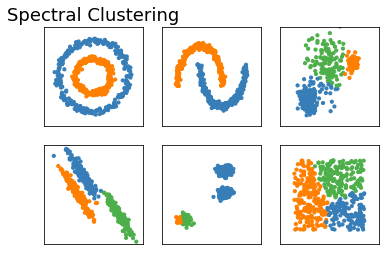

In [5]:
# specify default parameters for the algorithm
default_base = {
    'n_neighbors': 2, 
    'n_clusters': 3, 
    'affinity': 'nearest_neighbors' # try nearest_neighbors or rbf
}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})
]

calc_spectral_clust(datasets, default_base)

### Mincut problem

#### Idea

Find a partition of the graph such that it minimizes the weights between clusters and maximizes it 
within a group.

Spectral clustering turns out to be as an approximation to such graph partitioning problems.

> Given a graph with a adjacency matrix W, define
> $$W(A,B) := \sum_{i \in A, j \in B} w_{ij},$$
> where $A$ and $B$ are subsets of the nodes from the graph. Then, for a given number 
> k of subsets, the mincut problem is finding the best partition $A_1, \dots, A_k$, such that
> it minimizes the following quantity:
> $$ \text{cut}(A_1, \dots, A_k) := \frac{1}{2}\sum_{i=1}^{k} W(A_i, \bar{A}_i),$$
> where $\bar{A}_i$ is the complement of $A_i$.

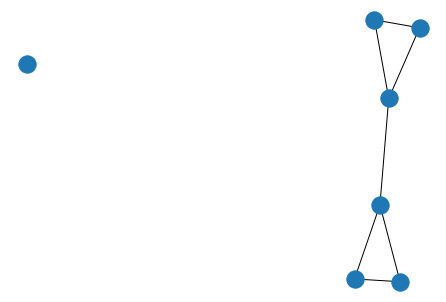

In [63]:
import networkx as nx
import pandas as pd 

df = pd.DataFrame({'Source' : [1, 1, 2, 4, 4, 4, 5, 7], 
                   'Target' : [2, 3, 3, 3, 5, 6, 6, 7]})
G = nx.from_pandas_edgelist(df, source='Source', target='Target')

nx.draw(G)

#### Large components

We need to further constrain the cut objective function. There are two different ways: 

> $$ \text{RatioCut} (A_1, \dots, A_k) = \frac{1}{2}\sum_{i=1}^{k} \frac{W(A_i, \bar{A}_i)}{|A_i|} = 
\sum_{i=1}^{k} \frac{cut(A_i, \bar{A}_i)}{|A_i|}$$

or 

>  $$ \text{Ncut} (A_1, \dots, A_k) = \frac{1}{2}\sum_{i=1}^{k} \frac{W(A_i, \bar{A}_i)}{Vol(A_i)} = 
\sum_{i=1}^{k} \frac{cut(A_i, \bar{A}_i)}{Vol(A_i)},$$

where $|A_i|$ is the number of vertices in $A_i$ and $Vol(A_i)$ is the sum of the edge weights in $A_i$. 

These problems have been show to be NP Hard, thus a relaxation is necessary. 

### Mincut problem and spectral clustering

Let $k = 2$ and $V$ a set of vertices. The objective function now is:

$$
\min_{A \subset V} \text{RatioCut}(A,\bar{A})
$$

#### Rewriting the problem

Given a subset $A \subset V$, define $v \in \mathbb{R}^n$ as

$$
v_i = \left\{\begin{aligned}
\sqrt{|\bar{A}|/|A|} & \quad \text{if } v_i \in A \\
\sqrt{|A|/|\bar{A}|} & \quad \text{if } v_i \in \bar{A}
\end{aligned} 
\right.
$$

It can be shown that

$$
v'Lv = |V| \cdot \text{RatioCut}(A, \bar{A})
$$

And note that $v \perp \mathbb{1}$, since

$$
\sum_{i=1}^{n} v_i = \sum_{i \in A}\sqrt{\frac{|\bar{A}|}{|A|}} - \sum_{i \in \bar{A}}\sqrt{\frac{|A|}{|\bar{A}|}} = 0 
$$

Also, 

$$
||v||^2 = \sum_{i = 1}^n v_i^2 = |A| \frac{|\bar{A}|}{|A|} + |\bar{A}|\frac{|A|}{|\bar{A}|} = |\bar{A}| + |A| = n
$$

Summing up, the optimization problem is

$$
\min_{A \subset V} v'Lv \text{ subject to } v \perp \mathbb{1}, ||v|| = \sqrt{n},
$$

with $v$ defined as earlier (depending on $A$). 

This is NP hard, therefore we need to relax this optimization problem.

The relaxed version:

$$
\min_{v \in \mathbb{R}^n} v'Lv \text{ subject to } v \perp \mathbb{1}, ||v|| = \sqrt{n},
$$

From Rayleigh-Ritz theorem, the solution to this problem corresponds to associated eigenvector of 
the second smallest eigenvalue. 

How to infer the clusters based on this vector? 

Using k-means to cluster the points in the real line, obtaining the clusters $C$ and $\bar{C}$. Then,

$$
\left\{\begin{aligned}
x_i \in A & \quad \text{if } v_i \in C \\
x_i \in \bar{A} & \quad \text{if } v_i \in \bar{C}
\end{aligned}
\right.
$$

In [5]:
df = pd.DataFrame({'Source' : [1, 1, 2, 4, 4, 4, 5], 
                   'Target' : [2, 3, 3, 3, 5, 6, 6]})
G = nx.from_pandas_edgelist(df, source='Source', target='Target')

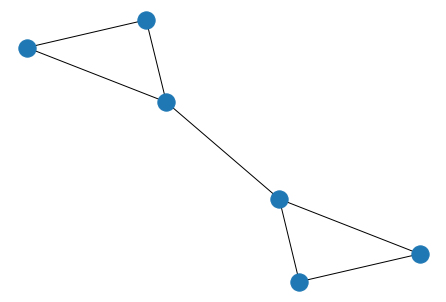

In [6]:
nx.draw(G)

In [7]:
import numpy as np 

adjacency_matrix = nx.linalg.adjacency_matrix(G).toarray()
degree_matrix = np.diag([degree[1] for degree in list(G.degree)])
laplacian_matrix = degree_matrix - adjacency_matrix
laplacian_matrix

array([[ 2, -1, -1,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0],
       [-1, -1,  3, -1,  0,  0],
       [ 0,  0, -1,  3, -1, -1],
       [ 0,  0,  0, -1,  2, -1],
       [ 0,  0,  0, -1, -1,  2]])

In [22]:
# calculate the first two eigenvectors from the laplacian
k = 2
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# extract first and second eigenvalues/eigenvectors
first_eigenvalues = np.argpartition(eigenvalues, k)[0:k]
U = eigenvectors[:, first_eigenvalues]
lambdas = eigenvalues[first_eigenvalues]

In [27]:
# apply k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state = 0)
kmeans.fit(U)

kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

<AxesSubplot:>

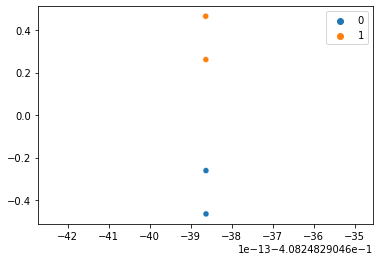

In [28]:
import seaborn as sns

# each color correspond to a group and each point correspond
# to a node in the graph
sns.scatterplot(x = U[:,0], y = U[:,1], hue = kmeans.labels_)

### Approximating RatioCut for arbitrary $k$




When $k$ is an arbitrary value, we need to modify the indicator vectors. Given a partition of $V$: $A_1, \dots, 
A_k$, define the indicator vectors $h_i$ as 
$$
h_{i,j} = \left\{\begin{aligned}
1/\sqrt{\bar{A_j}} & \quad \text{if } v_i \in A_j \\
0 & \quad \text{otherwise}
\end{aligned}
\right.
$$

Then define $H \in \mathbb{R}^{n \times k}$ as the matrix containing the $k$ indicator vectors as column.
Note also that $H'H = I$.

By some calculation, we get

$$h_i'Lh_i = \frac{\text{cut}(A_i, \bar{A_i})}{|A_i|}$$

Therefore,

$$
\text{RatioCut}(A_1, \dots, A_k) = \sum\limits_{i=1}^{k} h_i'Lh_i =\sum\limits_{i=1}^{k} (H'LH)_{ii} = 
Tr(H'LH)
$$

Thus, the problem can be defined as 

$$
\min_{A_1, \dots, A_k} Tr(H'LH) \quad \text{subject to } H'H = I, \text{with } H \text{ defined as above}
$$

And relaxing the problem, we get
$$
\min_{H \in \mathbb{R}^{n\times k}} Tr(H'LH) \quad \text{subject to } H'H = I
$$



In [20]:
G_1 = G

# add three new nodes that are connected 
for i in range(8,11):
    G_1.add_node(i)

G_1.add_edges_from(((8, 9), (9,10), (10, 8)))

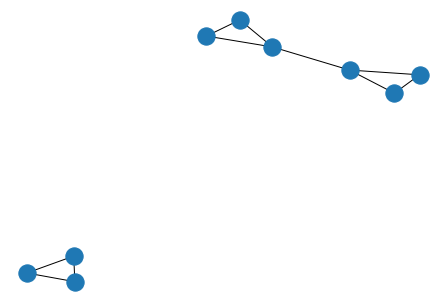

In [21]:
nx.draw(G_1)

In [37]:
k = 3

laplacian_matrix = nx.linalg.laplacian_matrix(G_1).toarray()
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# extract first and second eigenvalues/eigenvectors
first_eigenvalues = np.argpartition(eigenvalues, k)[0:k]
U = eigenvectors[:, first_eigenvalues]
lambdas = eigenvalues[first_eigenvalues]

In [40]:
kmeans = KMeans(n_clusters=k, random_state = 0)
kmeans.fit(U)

kmeans.labels_

array([2, 2, 2, 0, 0, 0, 1, 1, 1], dtype=int32)

<AxesSubplot:>

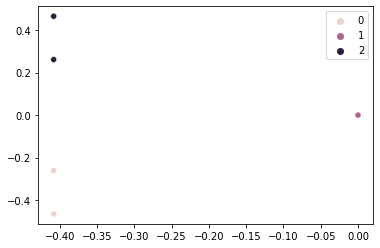

In [43]:
sns.scatterplot(x = U[:,1], y = U[:,2], hue = kmeans.labels_)

In [55]:
import plotly.express as px

df = pd.DataFrame(U)
df['groups'] = [str(i) for i in kmeans.labels_]

fig = px.scatter_3d(df, x=0, y=1, z=2,color='groups')
fig.show()

### References

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
- Nicolas notes
- A Tutorial on Spectral Clustering: https://doi.org/10.1007/s11222-007-9033-z